# **importing the required libraries**

In [ ]:
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from numpy import int64
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import csv
from sklearn import metrics
import numpy as np
import pandas as pd 
from sklearn import linear_model
import seaborn as sb
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# loading the dataset

In [ ]:
df = pd.read_csv("/crime_prep.csv")
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.67,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,0.43,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,0.12,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN
4,0.03,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN


# **Data Cleaning**

Missing data can either be filled with the means of the features or maybe 0 to ignore them or even other data imputation techniques to predict the missing values
In this case the mean of the features is taken for the missing values.

In [ ]:
# Handling the NULL values
df = df.fillna(df.mean())
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,8,58.826829,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.67,53,58.826829,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,...,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,0.43,24,58.826829,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,...,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,0.12,34,5.000000,81440.000000,Willingborotownship,1,0.04,0.77,1.00,0.08,...,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,0.03,42,95.000000,6096.000000,Bethlehemtownship,1,0.01,0.55,0.02,0.95,...,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


# Standardise v_cont_0, v_cat_0, v_cat_1 columns

In [ ]:
# Encoding the data to make it fit for any algorithm
lab_enc = preprocessing.LabelEncoder()
df['v_cat_0'] = lab_enc.fit_transform(df['v_cat_0'].values.reshape(-1, 1))
df['v_cat_1'] = lab_enc.fit_transform(df['v_cat_1'].values.reshape(-1, 1))
df['v_cont_0'] = lab_enc.fit_transform(df['v_cont_0'].values.reshape(-1, 1))
df['v_cat_2'] = lab_enc.fit_transform(df['v_cat_2'].values.reshape(-1, 1))
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,5,27,377,804,1,0.19,0.33,0.02,0.90,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.67,42,27,377,1625,1,0.00,0.16,0.12,0.74,...,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,0.43,18,27,377,1,1,0.00,0.42,0.49,0.56,...,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,0.12,25,2,736,1787,1,0.04,0.77,1.00,0.08,...,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,0.03,33,45,54,141,1,0.01,0.55,0.02,0.95,...,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


In [ ]:
# Removing the leading and trailing spaces in the resultant dataframe.
df.columns = df.columns.str.strip()

In [ ]:

# Descriptive statistics
df.describe()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.237979,21.877633,24.084754,386.008526,901.217653,5.493982,0.057593,0.463395,0.179629,0.753716,...,0.305987,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078
std,0.232985,13.249547,15.334646,148.766419,526.210333,2.873694,0.126906,0.163717,0.253442,0.244039,...,0.090628,0.109459,0.203092,0.229055,0.085793,0.056005,0.085459,0.162099,0.240328,0.065796
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.070000,9.000000,14.000000,377.000000,449.250000,3.000000,0.010000,0.350000,0.020000,0.630000,...,0.305987,0.020000,0.100000,0.020000,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078
50%,0.150000,25.000000,27.000000,377.000000,892.000000,5.000000,0.020000,0.440000,0.060000,0.850000,...,0.305987,0.040000,0.170000,0.070000,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078
75%,0.330000,33.000000,27.000000,377.000000,1354.750000,8.000000,0.050000,0.540000,0.230000,0.940000,...,0.305987,0.070000,0.280000,0.190000,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078
max,1.000000,45.000000,108.000000,799.000000,1827.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check if there are Null values 
df.isnull().sum()

target        0
v_cont_0      0
v_cat_0       0
v_cat_1       0
v_cat_2       0
             ..
v_cont_122    0
v_cont_123    0
v_cont_124    0
v_cont_125    0
v_cont_126    0
Length: 128, dtype: int64

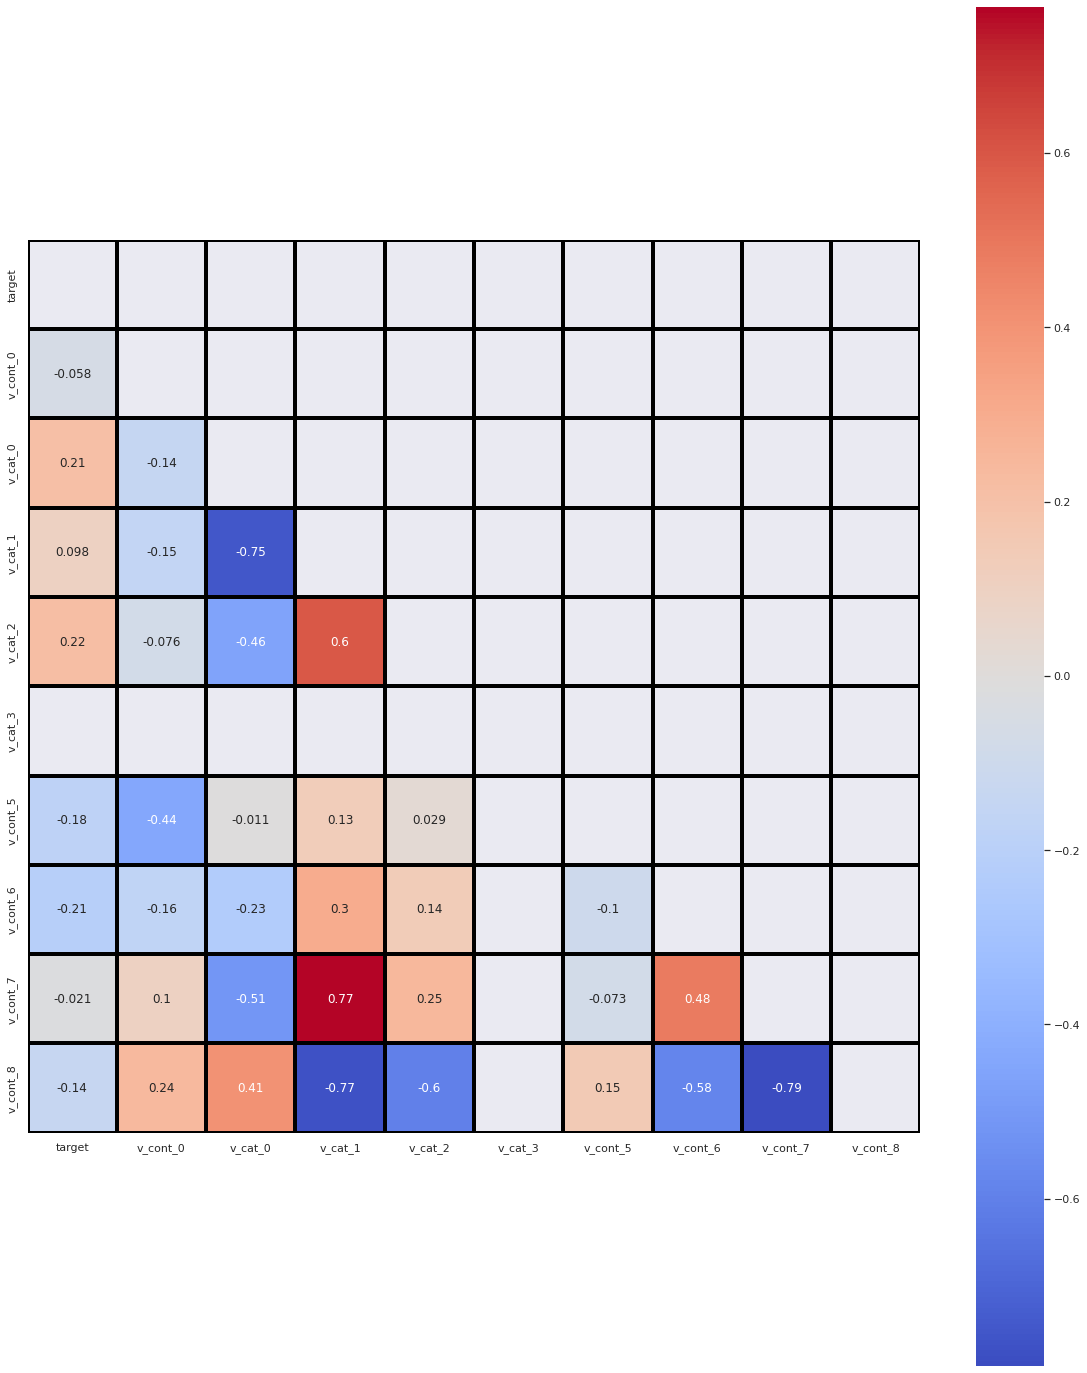

In [ ]:
#Create correlation matrix for all variables in the dataframe
sb.set(rc={'figure.figsize':(20,25)})
dff = df[:10][df.columns[:10]]
matrix = np.triu(dff.corr())
sb.heatmap(dff.corr(), annot = True,cmap= 'coolwarm' ,linewidths=3, linecolor='black', square=True, mask=matrix)

# Linear Regression

In [ ]:
# Selecting the DEPENDENT and INDEPENDENT  varables.
y = df['target']
x = df.drop(['target','v_cont_7'], axis = 1)

In [ ]:
# Splitting the dataset into TRAIN and TEST data. 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

#Split data into training and testing datasets 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#Linear regression using SKLearn Linear Regression method
from sklearn.linear_model import LinearRegression
#Build linear regression model
model = LinearRegression()
# Train the model, using training data set
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Intercept =', model.intercept_)
print('Coefficients = ', model.coef_)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(  mse)
r2score = r2_score(y_test, y_pred)
print("Mean squared error(MSE) = %.2f" %   mse)
print("Root Mean squared error(RMSE) = %.2f" % rmse)
print('R2 score = %.2f' % r2score)

Intercept = 1.8066559076205482
Coefficients =  [-3.58435247e-02 -2.68992580e-02 -2.56174091e-02  4.98986474e-03
 -1.57704754e-02  1.28328696e-01  6.90257652e-02 -2.16795899e-01
 -8.57862817e-02  1.99403943e-02  1.43904919e-01 -2.01364446e-01
 -1.64704445e-01  1.11727462e-01 -1.03809825e-01  4.36436780e-02
 -3.97890513e-01 -1.01664614e-01  2.53015425e-02 -1.40617637e-01
  1.29785629e-01  4.07060488e-02 -8.00670377e-02  4.22822369e-01
  1.07944728e-01 -2.68218473e-01 -3.72842134e-02 -2.41259672e-02
  3.69357328e-02  2.61113373e-02  2.00448558e-02  4.72249813e-02
 -1.71180213e-01 -6.76464701e-02  2.34418450e-03  1.11630247e-02
  1.96717373e-02  3.06300716e-01 -6.17806393e-02 -5.05056548e-02
  9.03239565e-02  1.72057577e-01  3.63883381e-01  1.52283548e-01
 -1.29681807e-02 -3.24765526e-01 -1.08183465e-02 -1.35025160e-01
 -3.01899064e-01  2.97576089e-02 -1.36591240e-02  8.46877668e-02
 -2.27086936e-01 -1.39200715e-01  1.31127585e-01 -1.45026133e-01
 -3.78743533e-02  1.14023966e-01 -1.2981647

# Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
# Handling the continous values in dataset(converting to categorical values)
df = df.round(0).astype(int)
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0,5,27,377,804,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,42,27,377,1625,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,18,27,377,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,25,2,736,1787,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,33,45,54,141,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Check if there are Null values 
df.isnull().sum()

target        0
v_cont_0      0
v_cat_0       0
v_cat_1       0
v_cat_2       0
             ..
v_cont_122    0
v_cont_123    0
v_cont_124    0
v_cont_125    0
v_cont_126    0
Length: 128, dtype: int64

In [ ]:
# Handling the NULL values
df = df.fillna(df.mean())
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0,5,27,377,804,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,42,27,377,1625,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,18,27,377,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,25,2,736,1787,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,33,45,54,141,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Encoding the data to make it fit for any algorithm
df['v_cat_0'] = lab_enc.fit_transform(df['v_cat_0'].values.reshape(-1, 1))
df['v_cat_1'] = lab_enc.fit_transform(df['v_cat_1'].values.reshape(-1, 1))
df['v_cont_0'] = lab_enc.fit_transform(df['v_cont_0'].values.reshape(-1, 1))
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0,5,27,377,804,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,42,27,377,1625,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,18,27,377,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,25,2,736,1787,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,33,45,54,141,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['target', 'v_cont_0', 'v_cat_0', 'v_cat_1', 'v_cat_2', 'v_cat_3',
       'v_cont_5', 'v_cont_6', 'v_cont_7', 'v_cont_8',
       ...
       'v_cont_117', 'v_cont_118', 'v_cont_119', 'v_cont_120', 'v_cont_121',
       'v_cont_122', 'v_cont_123', 'v_cont_124', 'v_cont_125', 'v_cont_126'],
      dtype='object', length=128)

In [ ]:
# Selecting the DEPENDENT  and  INDEPENDENT variables.
y = df['target']
x = df.drop(['target','v_cont_7'], axis = 1)

In [ ]:
# Splitting the dataset into TRAIN and TEST .
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

#Split data into training and testing datasets 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8395989974937343


In [ ]:
print("Accuracy % = :",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy % = : 83.95989974937343


# **Optimizing the algorithm for more performance**

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9097744360902256


In [ ]:
print("Accuracy % :",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy % : 90.97744360902256


# **Deplying the ML model into the local disk** i.e. saving

In [ ]:
import joblib

In [ ]:
import pickle

In [ ]:
#filename = 'finalized_model.sav'
#joblib.dump(clf, filename)

filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# **Using the saved model for prediction**

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.9097744360902256
